<a href="https://colab.research.google.com/github/Mwangi-Jeff/AI-Coursework-2025/blob/main/PracticalAssignmente7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('diamonds.csv')

Saving diamonds.csv to diamonds.csv


Exploratory data analysis


In [2]:
print("First 5 rows of the DataFrame:")
print(df.head())

print("\nDataFrame Info:")
df.info()

First 5 rows of the DataFrame:
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth     

In [3]:
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)
    print("Dropped 'Unnamed: 0' column.")
else:
    print("'Unnamed: 0' column not found.")

print("\nChecking for missing values:")
missing_values_count = df.isnull().sum()
print(missing_values_count[missing_values_count > 0])

if (missing_values_count > 0).any():
    print("\nMissing values detected. Dropping rows with missing values.")
    df.dropna(inplace=True)
    print("Rows with missing values dropped.")
else:
    print("No missing values found.")

print("\nDataFrame shape after cleaning:")
print(df.shape)

Dropped 'Unnamed: 0' column.

Checking for missing values:
Series([], dtype: int64)
No missing values found.

DataFrame shape after cleaning:
(53940, 10)


In [4]:
print("\nDescriptive statistics for numerical columns:")
print(df.describe())


Descriptive statistics for numerical columns:
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      

In [5]:
print("\nValue counts for categorical columns:")
for column in df.select_dtypes(include='object').columns:
    print(f"\n--- {column} ---")
    print(df[column].value_counts())


Value counts for categorical columns:

--- cut ---
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

--- color ---
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

--- clarity ---
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported: matplotlib.pyplot as plt, seaborn as sns")

Libraries imported: matplotlib.pyplot as plt, seaborn as sns


In [7]:
print(f"Original DataFrame shape: {df.shape}")

df_cleaned = df.loc[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)].copy()

print(f"DataFrame shape after removing 0-dimension entries: {df_cleaned.shape}")

df = df_cleaned
print("Updated DataFrame 'df' after removing 0-dimension entries.")

Original DataFrame shape: (53940, 10)
DataFrame shape after removing 0-dimension entries: (53920, 10)
Updated DataFrame 'df' after removing 0-dimension entries.


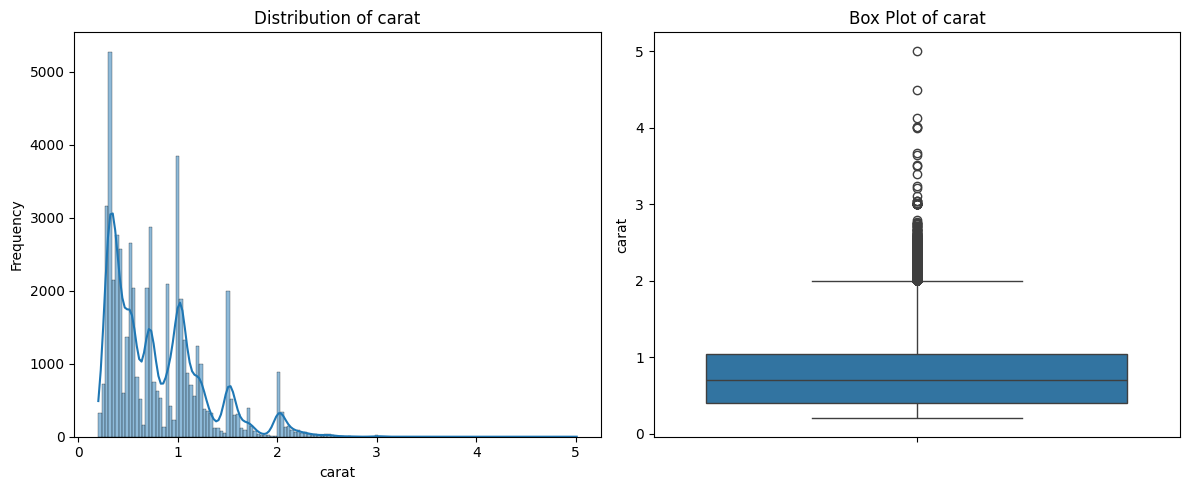

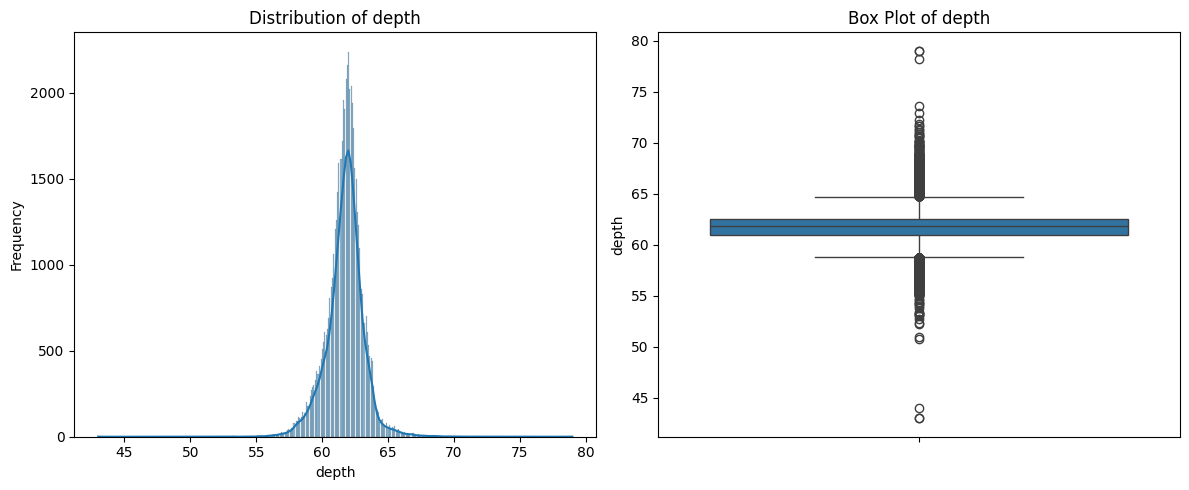

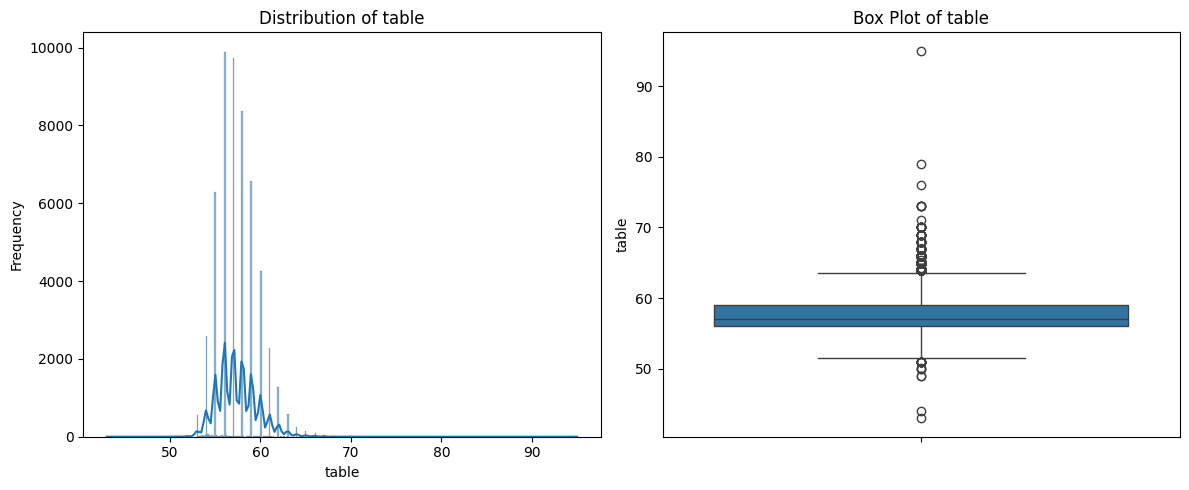

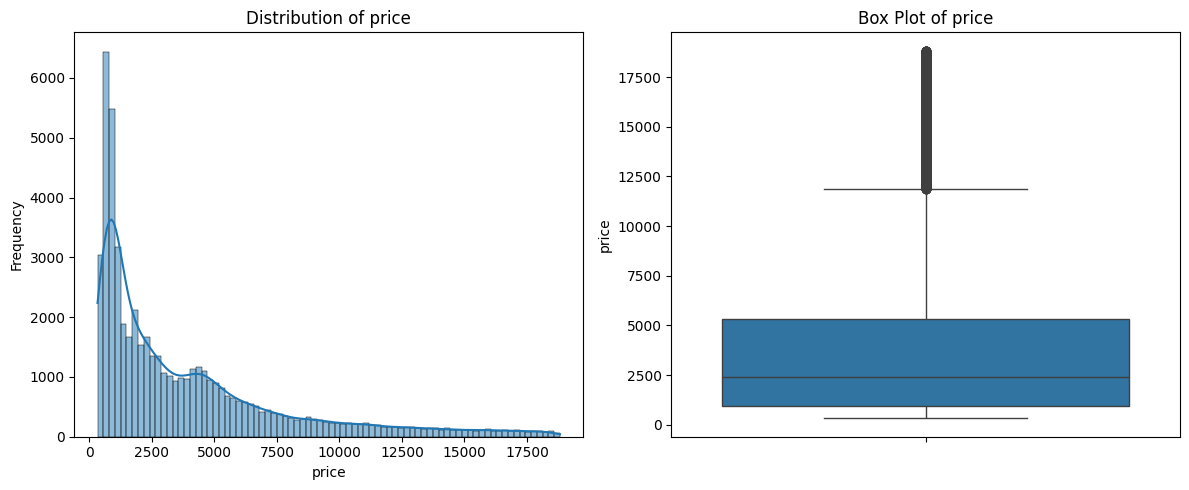

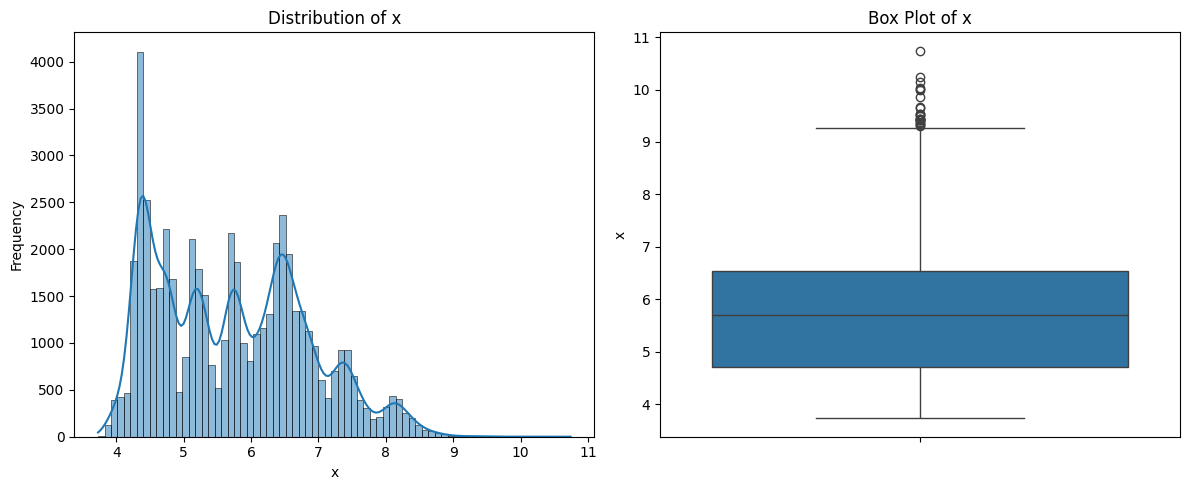

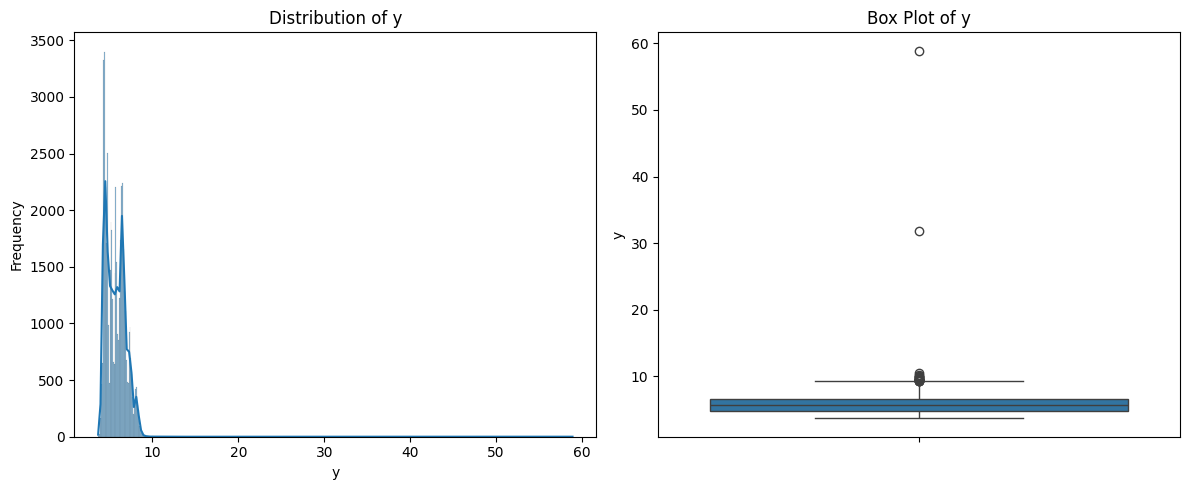

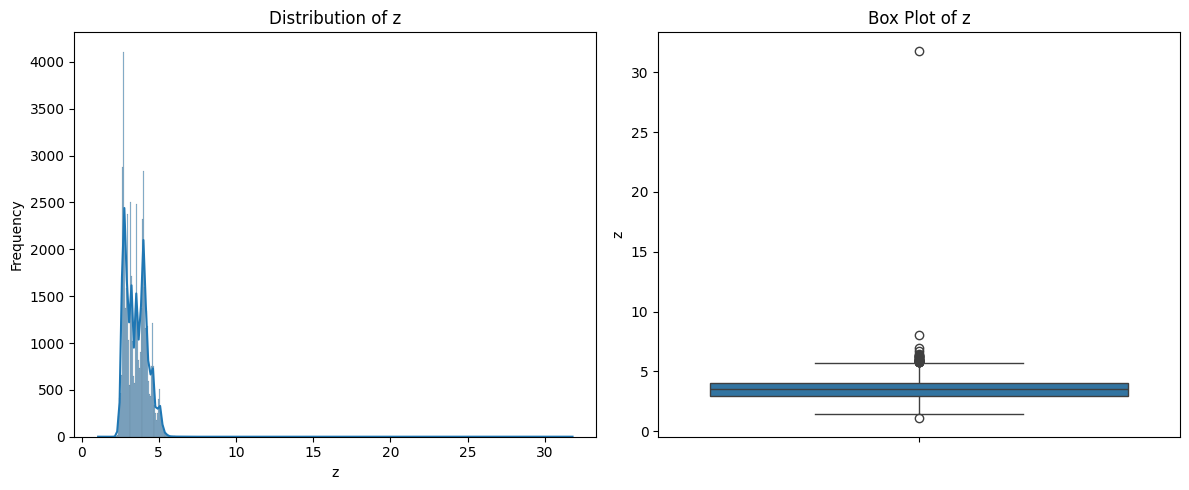

In [8]:
numerical_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

/tmp/ipython-input-3252173566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


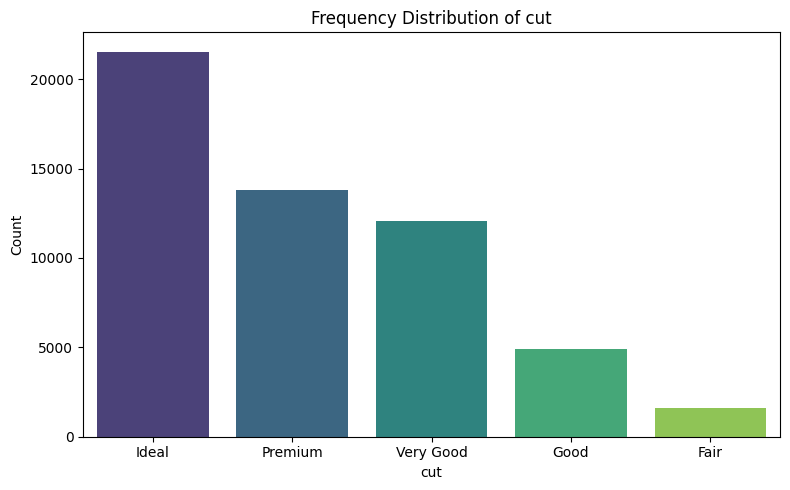

/tmp/ipython-input-3252173566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


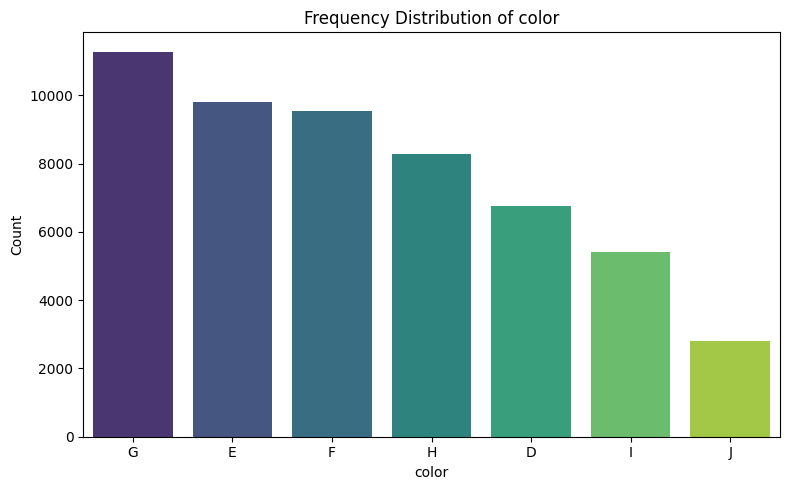

/tmp/ipython-input-3252173566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


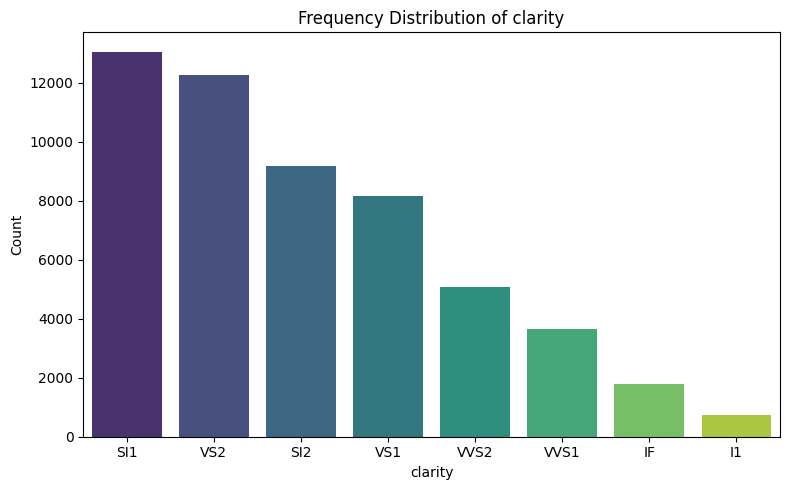

In [9]:
categorical_cols = ['cut', 'color', 'clarity']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

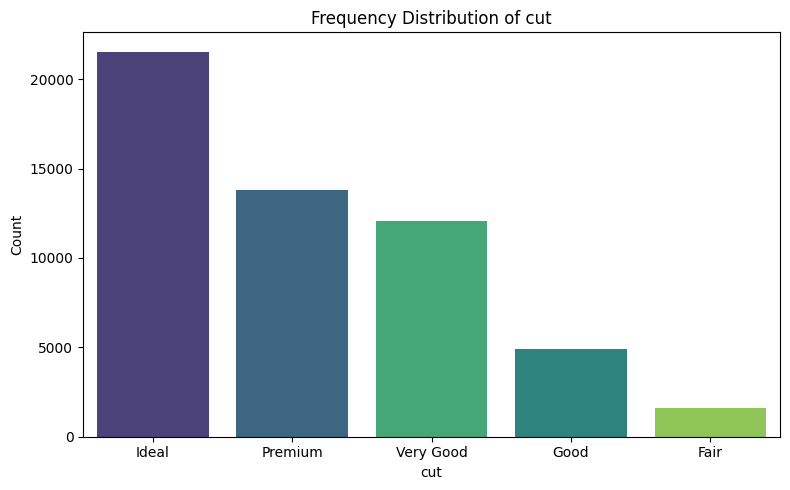

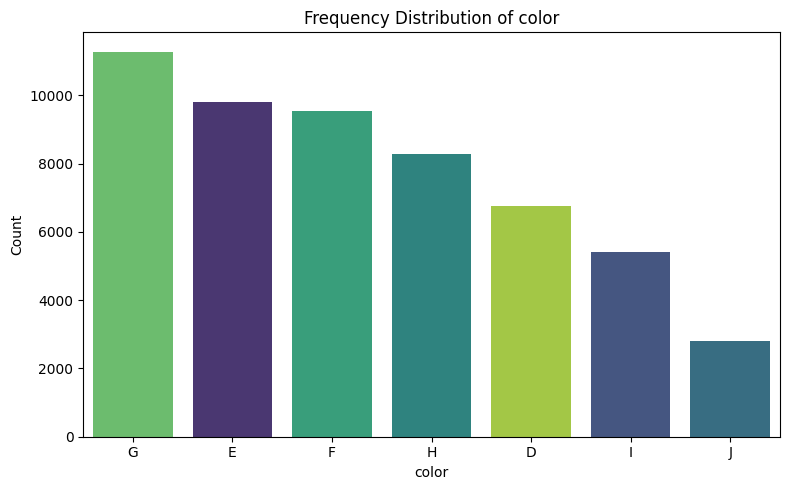

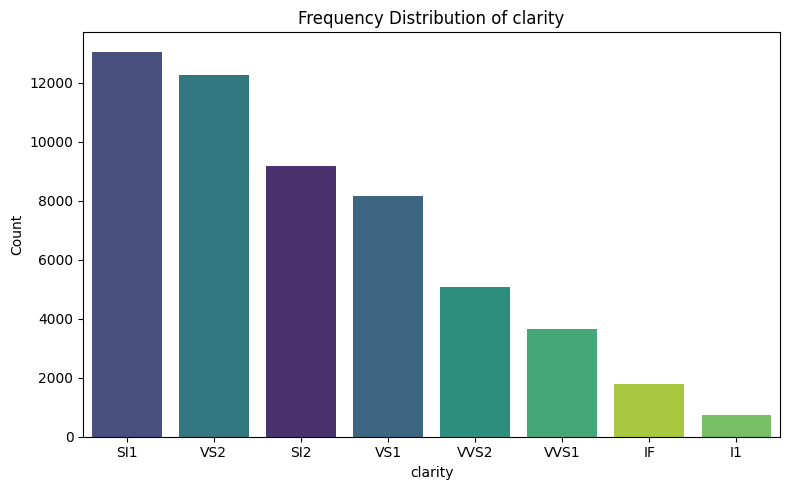

In [10]:
categorical_cols = ['cut', 'color', 'clarity']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis', hue=col, legend=False)
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

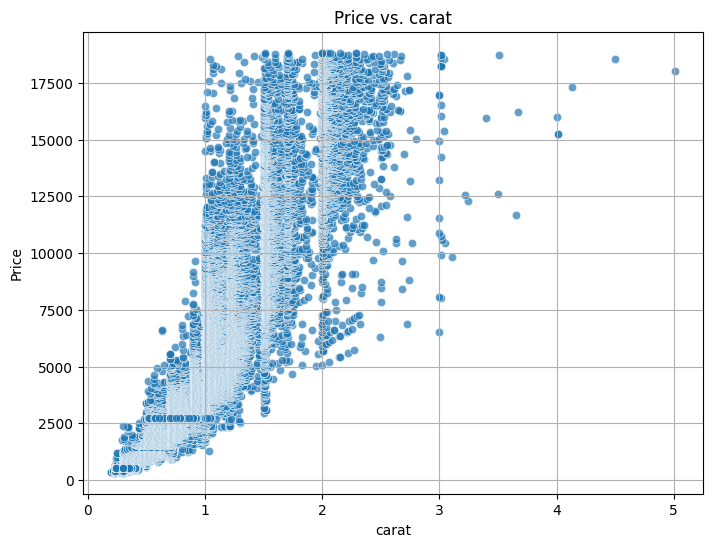

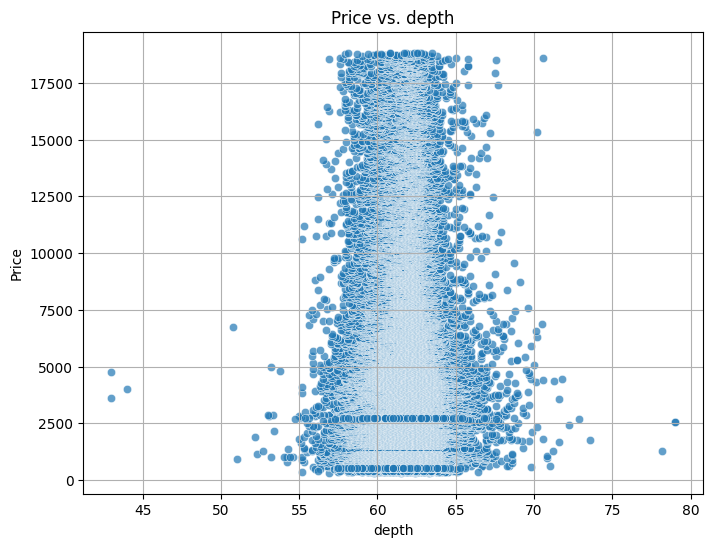

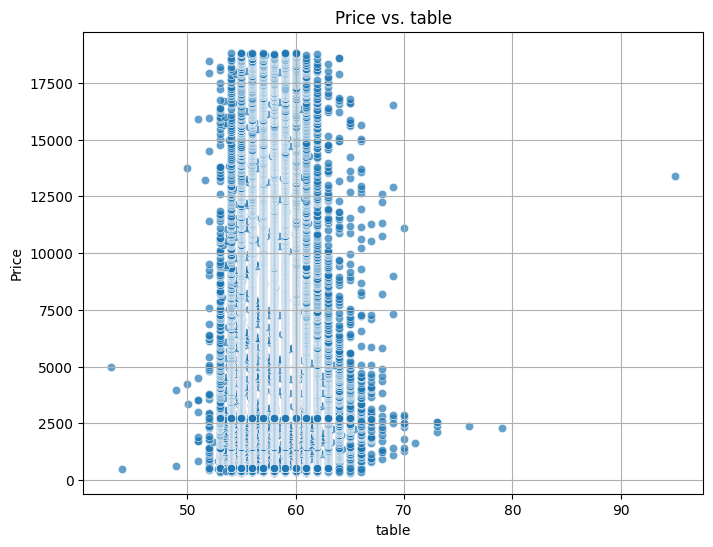

In [11]:
numerical_cols_for_bivariate = ['carat', 'depth', 'table']

for col in numerical_cols_for_bivariate:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y='price', alpha=0.7)
    plt.title(f'Price vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

/tmp/ipython-input-2503901444.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='price', order=order, palette='viridis')


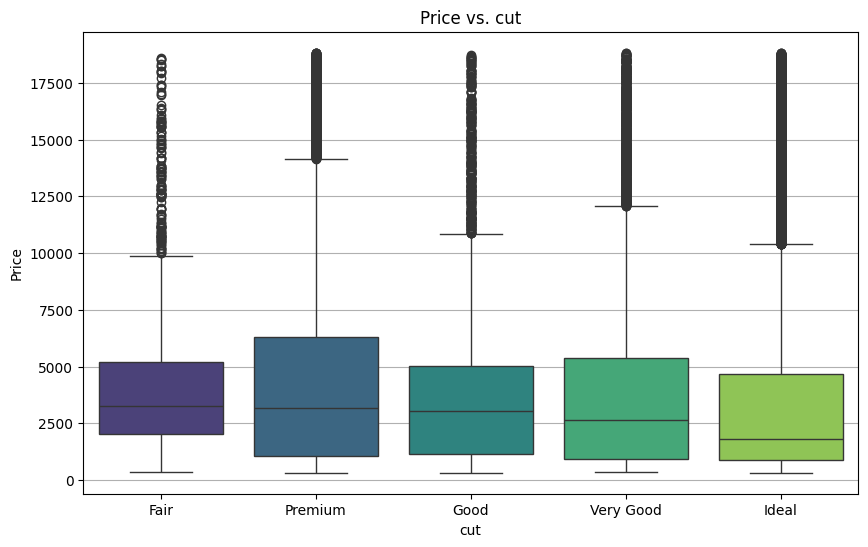

/tmp/ipython-input-2503901444.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='price', order=order, palette='viridis')


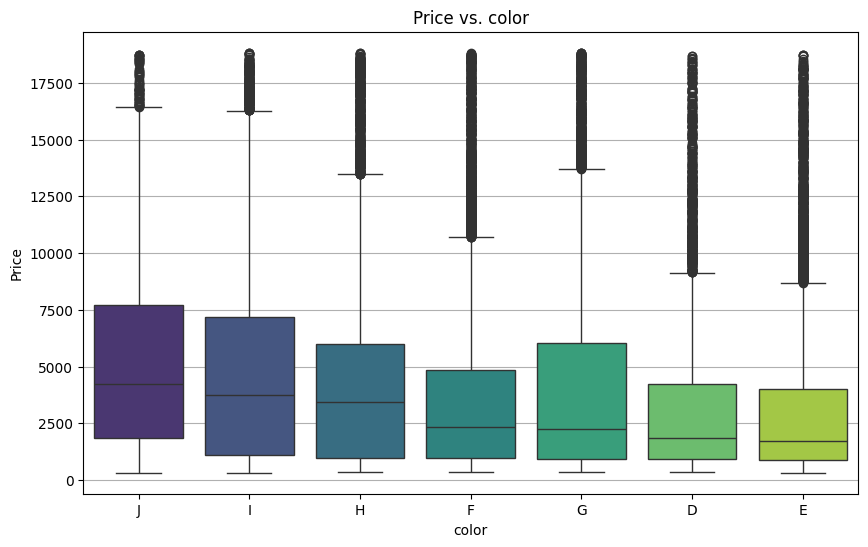

/tmp/ipython-input-2503901444.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='price', order=order, palette='viridis')


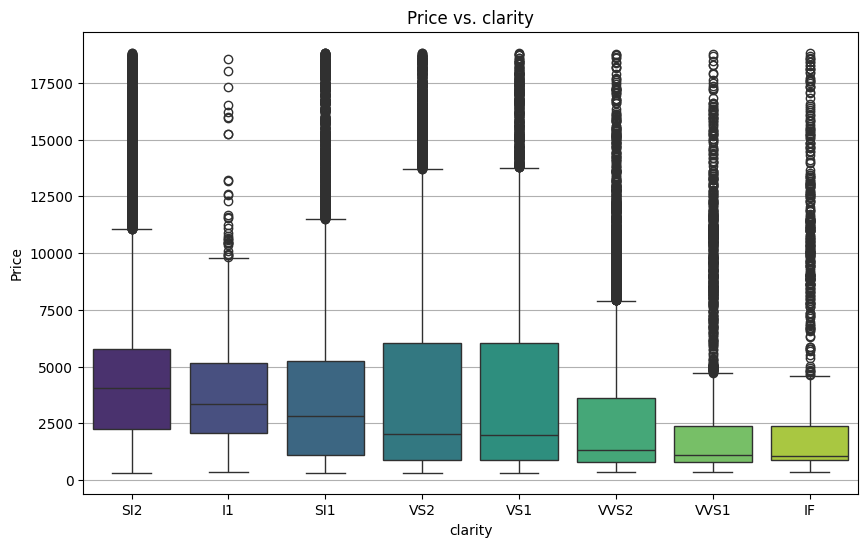

In [12]:
categorical_cols_for_bivariate = ['cut', 'color', 'clarity']

for col in categorical_cols_for_bivariate:
    plt.figure(figsize=(10, 6))
    # Order categories by median price
    order = df.groupby(col)['price'].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x=col, y='price', order=order, palette='viridis')
    plt.title(f'Price vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.grid(axis='y')
    plt.show()

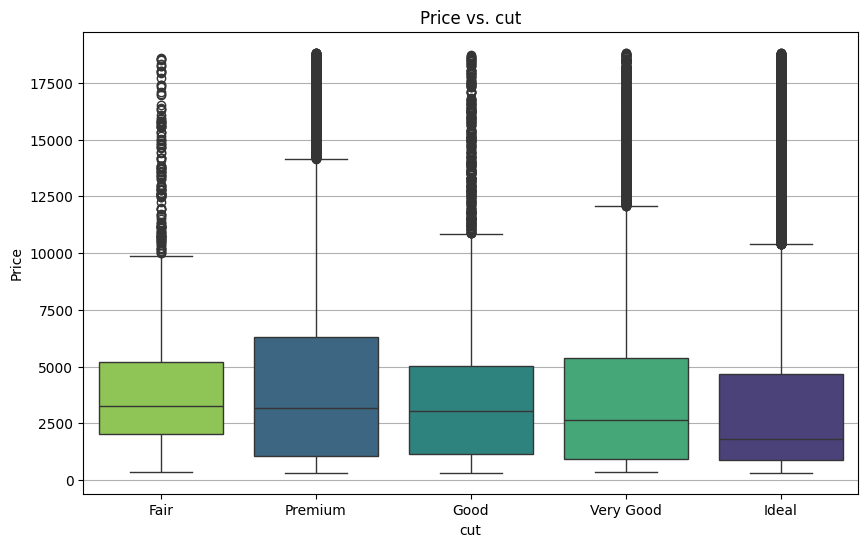

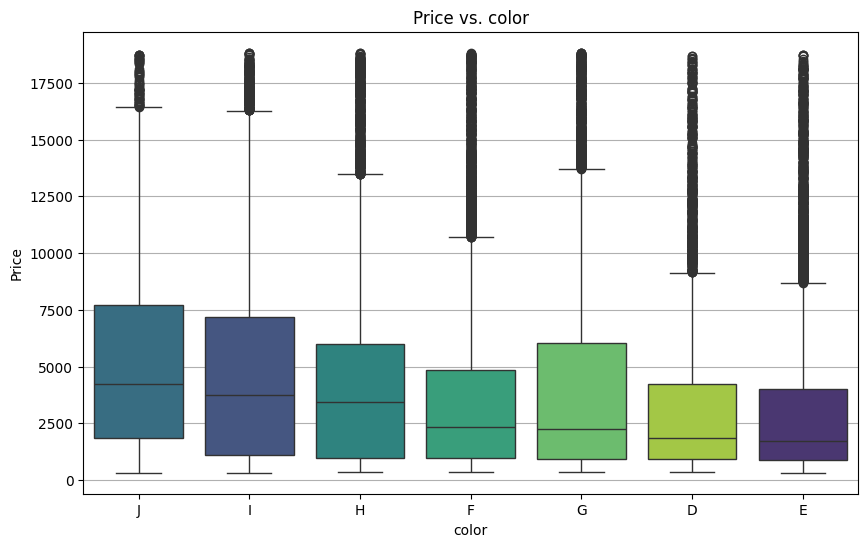

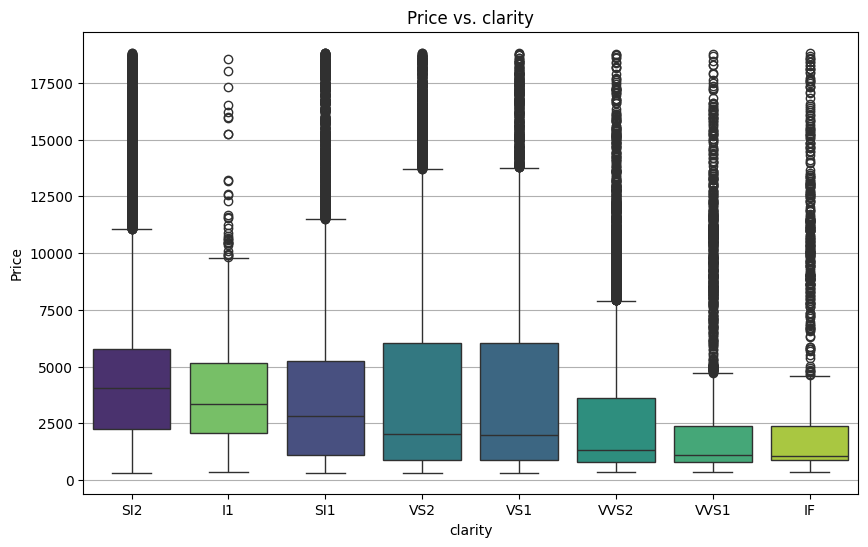

In [13]:
categorical_cols_for_bivariate = ['cut', 'color', 'clarity']

for col in categorical_cols_for_bivariate:
    plt.figure(figsize=(10, 6))
    # Order categories by median price
    order = df.groupby(col)['price'].median().sort_values(ascending=False).index
    sns.boxplot(data=df, x=col, y='price', order=order, palette='viridis', hue=col, legend=False)
    plt.title(f'Price vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.grid(axis='y')
    plt.show()

In [14]:
diamonds_model = df.sample(n=12500, random_state=42)
print("Created 'diamonds_model' DataFrame with 12500 random samples.")
print(f"Shape of diamonds_model: {diamonds_model.shape}")
print("First 5 rows of diamonds_model:")
print(diamonds_model.head())

Created 'diamonds_model' DataFrame with 12500 random samples.
Shape of diamonds_model: (12500, 10)
First 5 rows of diamonds_model:
       carat      cut color clarity  depth  table  price     x     y     z
34704   0.31  Premium     F      IF   60.8   59.0    874  4.36  4.39  2.66
21099   1.29    Ideal     H     VS1   61.8   56.0   9273  6.97  7.02  4.32
23685   1.52  Premium     F     SI1   62.6   59.0  11743  7.36  7.27  4.58
39200   0.41     Good     F    VVS2   63.6   56.0   1064  4.72  4.68  2.99
35560   0.35  Premium     G     VS1   61.5   58.0    906  4.54  4.50  2.78


In [15]:
categorical_features = ['cut', 'color', 'clarity']
diamonds_encoded = pd.get_dummies(diamonds_model, columns=categorical_features, drop_first=True)

print("First 5 rows of the diamonds_encoded DataFrame:")
print(diamonds_encoded.head())

print("\nShape of the diamonds_encoded DataFrame:")
print(diamonds_encoded.shape)

First 5 rows of the diamonds_encoded DataFrame:
       carat  depth  table  price     x     y     z  cut_Good  cut_Ideal  \
34704   0.31   60.8   59.0    874  4.36  4.39  2.66     False      False   
21099   1.29   61.8   56.0   9273  6.97  7.02  4.32     False       True   
23685   1.52   62.6   59.0  11743  7.36  7.27  4.58     False      False   
39200   0.41   63.6   56.0   1064  4.72  4.68  2.99      True      False   
35560   0.35   61.5   58.0    906  4.54  4.50  2.78     False      False   

       cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
34704         True  ...    False    False    False        True        False   
21099        False  ...     True    False    False       False        False   
23685         True  ...    False    False    False       False         True   
39200        False  ...    False    False    False       False        False   
35560         True  ...    False    False    False       False        False   

       clarity_SI2  

In [16]:
from sklearn.model_selection import train_test_split

X = diamonds_encoded.drop('price', axis=1)
y = diamonds_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Shapes of the resulting datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Shapes of the resulting datasets:
X_train shape: (10000, 23)
X_test shape: (2500, 23)
y_train shape: (10000,)
y_test shape: (2500,)


In [17]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print the intercept and coefficients
print(f"Model Intercept: {model.intercept_}")
print(f"Model Coefficients: {model.coef_}")

Model Intercept: 6131.471887443975
Model Coefficients: [12083.68638181   -95.22778976   -31.7414525  -1380.4060313
    22.50819195   -28.31119134   601.19907382   746.62863284
   701.75622727   664.95185608  -148.07305217  -197.03829802
  -385.76086971  -951.09955174 -1385.11190507 -2344.17989513
  4850.49852688  3306.44906698  2322.3002814   4170.14285566
  3860.33369404  4626.19404366  4572.81279153]


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 716.18
Mean Squared Error (MSE): 1186611.02
R-squared (R2): 0.93


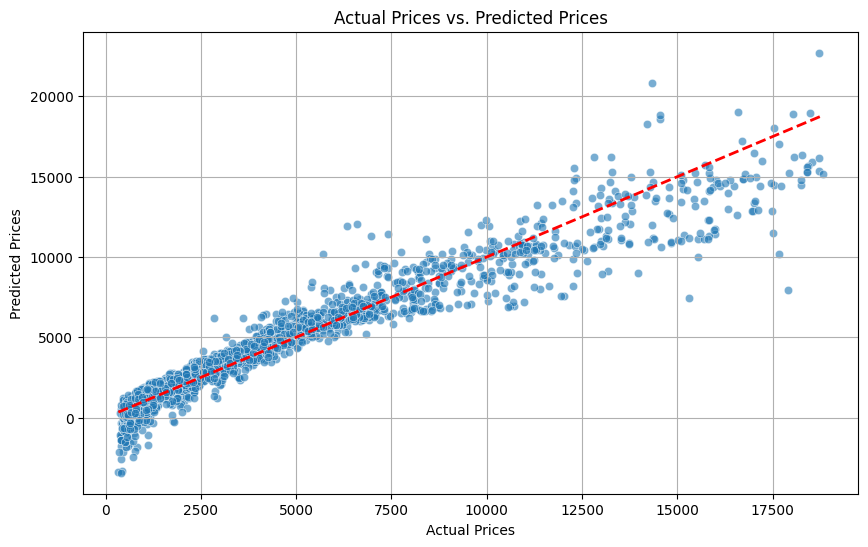

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line for perfect prediction
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

continuous_features = ['carat', 'depth', 'table', 'x', 'y', 'z']

# Extract continuous features from diamonds_encoded (excluding 'price' as it's the target)
X_continuous = diamonds_encoded[continuous_features]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the continuous features
scaled_features = scaler.fit_transform(X_continuous)

print("Selected continuous features:")
print(X_continuous.head())
print("\nShape of selected continuous features:", X_continuous.shape)
print("\nScaled continuous features (first 5 rows, first 5 columns):")
print(scaled_features[:5, :5])
print("\nShape of scaled features:", scaled_features.shape)

Selected continuous features:
       carat  depth  table     x     y     z
34704   0.31   60.8   59.0  4.36  4.39  2.66
21099   1.29   61.8   56.0  6.97  7.02  4.32
23685   1.52   62.6   59.0  7.36  7.27  4.58
39200   0.41   63.6   56.0  4.72  4.68  2.99
35560   0.35   61.5   58.0  4.54  4.50  2.78

Shape of selected continuous features: (12500, 6)

Scaled continuous features (first 5 rows, first 5 columns):
[[-1.03378195 -0.66329782  0.68726148 -1.22902649 -1.18799866]
 [ 1.04939644  0.02783899 -0.64506751  1.11373053  1.13753649]
 [ 1.53830565  0.58074844  0.68726148  1.46379767  1.35859497]
 [-0.82121273  1.27188525 -0.64506751 -0.90588759 -0.93157083]
 [-0.94875426 -0.17950205  0.24315182 -1.06745704 -1.09073293]]

Shape of scaled features: (12500, 6)


In [22]:
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the scaled features
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['principal_component_1', 'principal_component_2'])

# Reset index of diamonds_model['price'] to align with pca_df
price_reset_index = diamonds_model['price'].reset_index(drop=True)

# Concatenate PCA components with the 'price' target variable
diamonds_pca = pd.concat([pca_df, price_reset_index], axis=1)

print("First 5 rows of the diamonds_pca DataFrame:")
print(diamonds_pca.head())

print("\nShape of the diamonds_pca DataFrame:")
print(diamonds_pca.shape)

First 5 rows of the diamonds_pca DataFrame:
   principal_component_1  principal_component_2  price
0              -2.216997              -1.151922    874
1               2.081108               0.641067   9273
2               2.952050               0.224372  11743
3              -1.777471               1.224534   1064
4              -2.023538              -0.475368    906

Shape of the diamonds_pca DataFrame:
(12500, 3)


In [23]:
from sklearn.model_selection import train_test_split

X_pca = diamonds_pca[['principal_component_1', 'principal_component_2']]
y_pca = diamonds_pca['price']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

print("Shapes of the PCA-transformed training and testing sets:")
print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")
print(f"y_train_pca shape: {y_train_pca.shape}")
print(f"y_test_pca shape: {y_test_pca.shape}")

Shapes of the PCA-transformed training and testing sets:
X_train_pca shape: (10000, 2)
X_test_pca shape: (2500, 2)
y_train_pca shape: (10000,)
y_test_pca shape: (2500,)


In [24]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
pca_model = LinearRegression()

# Train the model using the PCA-transformed training data
pca_model.fit(X_train_pca, y_train_pca)

# Print the intercept and coefficients
print(f"PCA Model Intercept: {pca_model.intercept_}")
print(f"PCA Model Coefficients: {pca_model.coef_}")

PCA Model Intercept: 3903.6845078313604
PCA Model Coefficients: [1790.70157164  152.67689212]


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_pca = pca_model.predict(X_test_pca)
print("Predictions made on the PCA test set.")

Predictions made on the PCA test set.


In [26]:
mae_pca = mean_absolute_error(y_test_pca, y_pred_pca)
mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
r2_pca = r2_score(y_test_pca, y_pred_pca)

print(f"PCA Model Mean Absolute Error (MAE): {mae_pca:.2f}")
print(f"PCA Model Mean Squared Error (MSE): {mse_pca:.2f}")
print(f"PCA Model R-squared (R2): {r2_pca:.2f}")

PCA Model Mean Absolute Error (MAE): 1280.75
PCA Model Mean Squared Error (MSE): 3162490.45
PCA Model R-squared (R2): 0.81


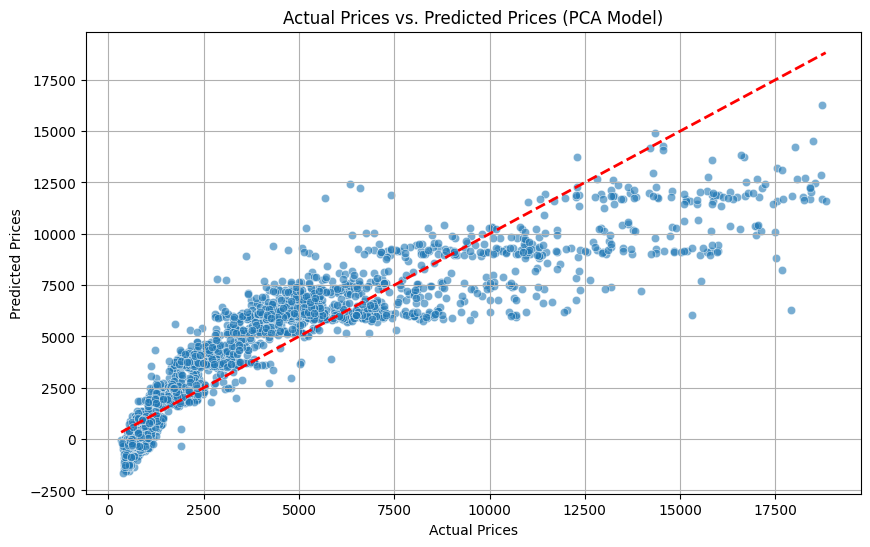

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pca, y=y_pred_pca, alpha=0.6)
plt.plot([y_test_pca.min(), y_test_pca.max()], [y_test_pca.min(), y_test_pca.max()], 'r--', lw=2) # Diagonal line for perfect prediction
plt.title('Actual Prices vs. Predicted Prices (PCA Model)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

In [28]:
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression model with a default alpha
lasso_model = Lasso(alpha=1.0, random_state=42)

# Train the model
lasso_model.fit(X_train, y_train)

# Print the intercept and coefficients
print(f"Lasso Model Intercept: {lasso_model.intercept_}")
print(f"Lasso Model Coefficients: {lasso_model.coef_}")

Lasso Model Intercept: 7143.864073890568
Lasso Model Coefficients: [ 1.19076995e+04 -1.02301917e+02 -3.48647890e+01 -1.30042652e+03
  3.56428863e-01 -2.22817111e+01  4.86882535e+02  6.32714984e+02
  5.84491334e+02  5.54814910e+02 -9.55066443e+01 -1.41863727e+02
 -3.30959361e+02 -8.91665211e+02 -1.31389270e+03 -2.25680800e+03
  4.25961594e+03  2.75494718e+03  1.77480133e+03  3.60841143e+03
  3.30699776e+03  4.05500512e+03  4.00837113e+03]


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Model Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"Lasso Model Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Lasso Model R-squared (R2): {r2_lasso:.2f}")

Lasso Model Mean Absolute Error (MAE): 713.26
Lasso Model Mean Squared Error (MSE): 1197169.32
Lasso Model R-squared (R2): 0.93


In [30]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression model with a default alpha
ridge_model = Ridge(alpha=1.0, random_state=42)

# Train the model
ridge_model.fit(X_train, y_train)

# Print the intercept and coefficients
print(f"Ridge Model Intercept: {ridge_model.intercept_}")
print(f"Ridge Model Coefficients: {ridge_model.coef_}")

Ridge Model Intercept: 6061.324389044201
Ridge Model Coefficients: [11932.92193146   -94.198835     -31.9161858  -1321.07683778
    22.21731153   -28.93378299   607.79427794   754.70541394
   707.51585205   672.76743914  -144.15104206  -192.24709912
  -380.57100649  -943.24126578 -1372.33496748 -2324.80018177
  4623.80812456  3091.61140786  2111.88073721  3952.92202314
  3645.57516696  4407.23537622  4355.71708721]


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_ridge = ridge_model.predict(X_test)
print("Predictions made on the test set using Ridge model.")

Predictions made on the test set using Ridge model.


In [32]:
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Model Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Ridge Model Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"Ridge Model R-squared (R2): {r2_ridge:.2f}")

Ridge Model Mean Absolute Error (MAE): 715.81
Ridge Model Mean Squared Error (MSE): 1189319.57
Ridge Model R-squared (R2): 0.93
